# torch part2

- math
- reduction
- comparison

In [5]:
import torch
print(torch.__version__)

1.10.0+cu111


In [6]:
import numpy as np
print(np.version.version)

1.19.5


In [7]:
def prop(t):
    print("dim->>{} : shape->>{} : dtype->>{} : GPU->>{} : Type-->{}".format(t.ndim, t.shape, t.dtype, t.is_cuda, type(t)))

In [8]:
x = torch.tensor([5])
prop(x)

dim->>1 : shape->>torch.Size([1]) : dtype->>torch.int64 : GPU->>False : Type--><class 'torch.Tensor'>


## Math operation

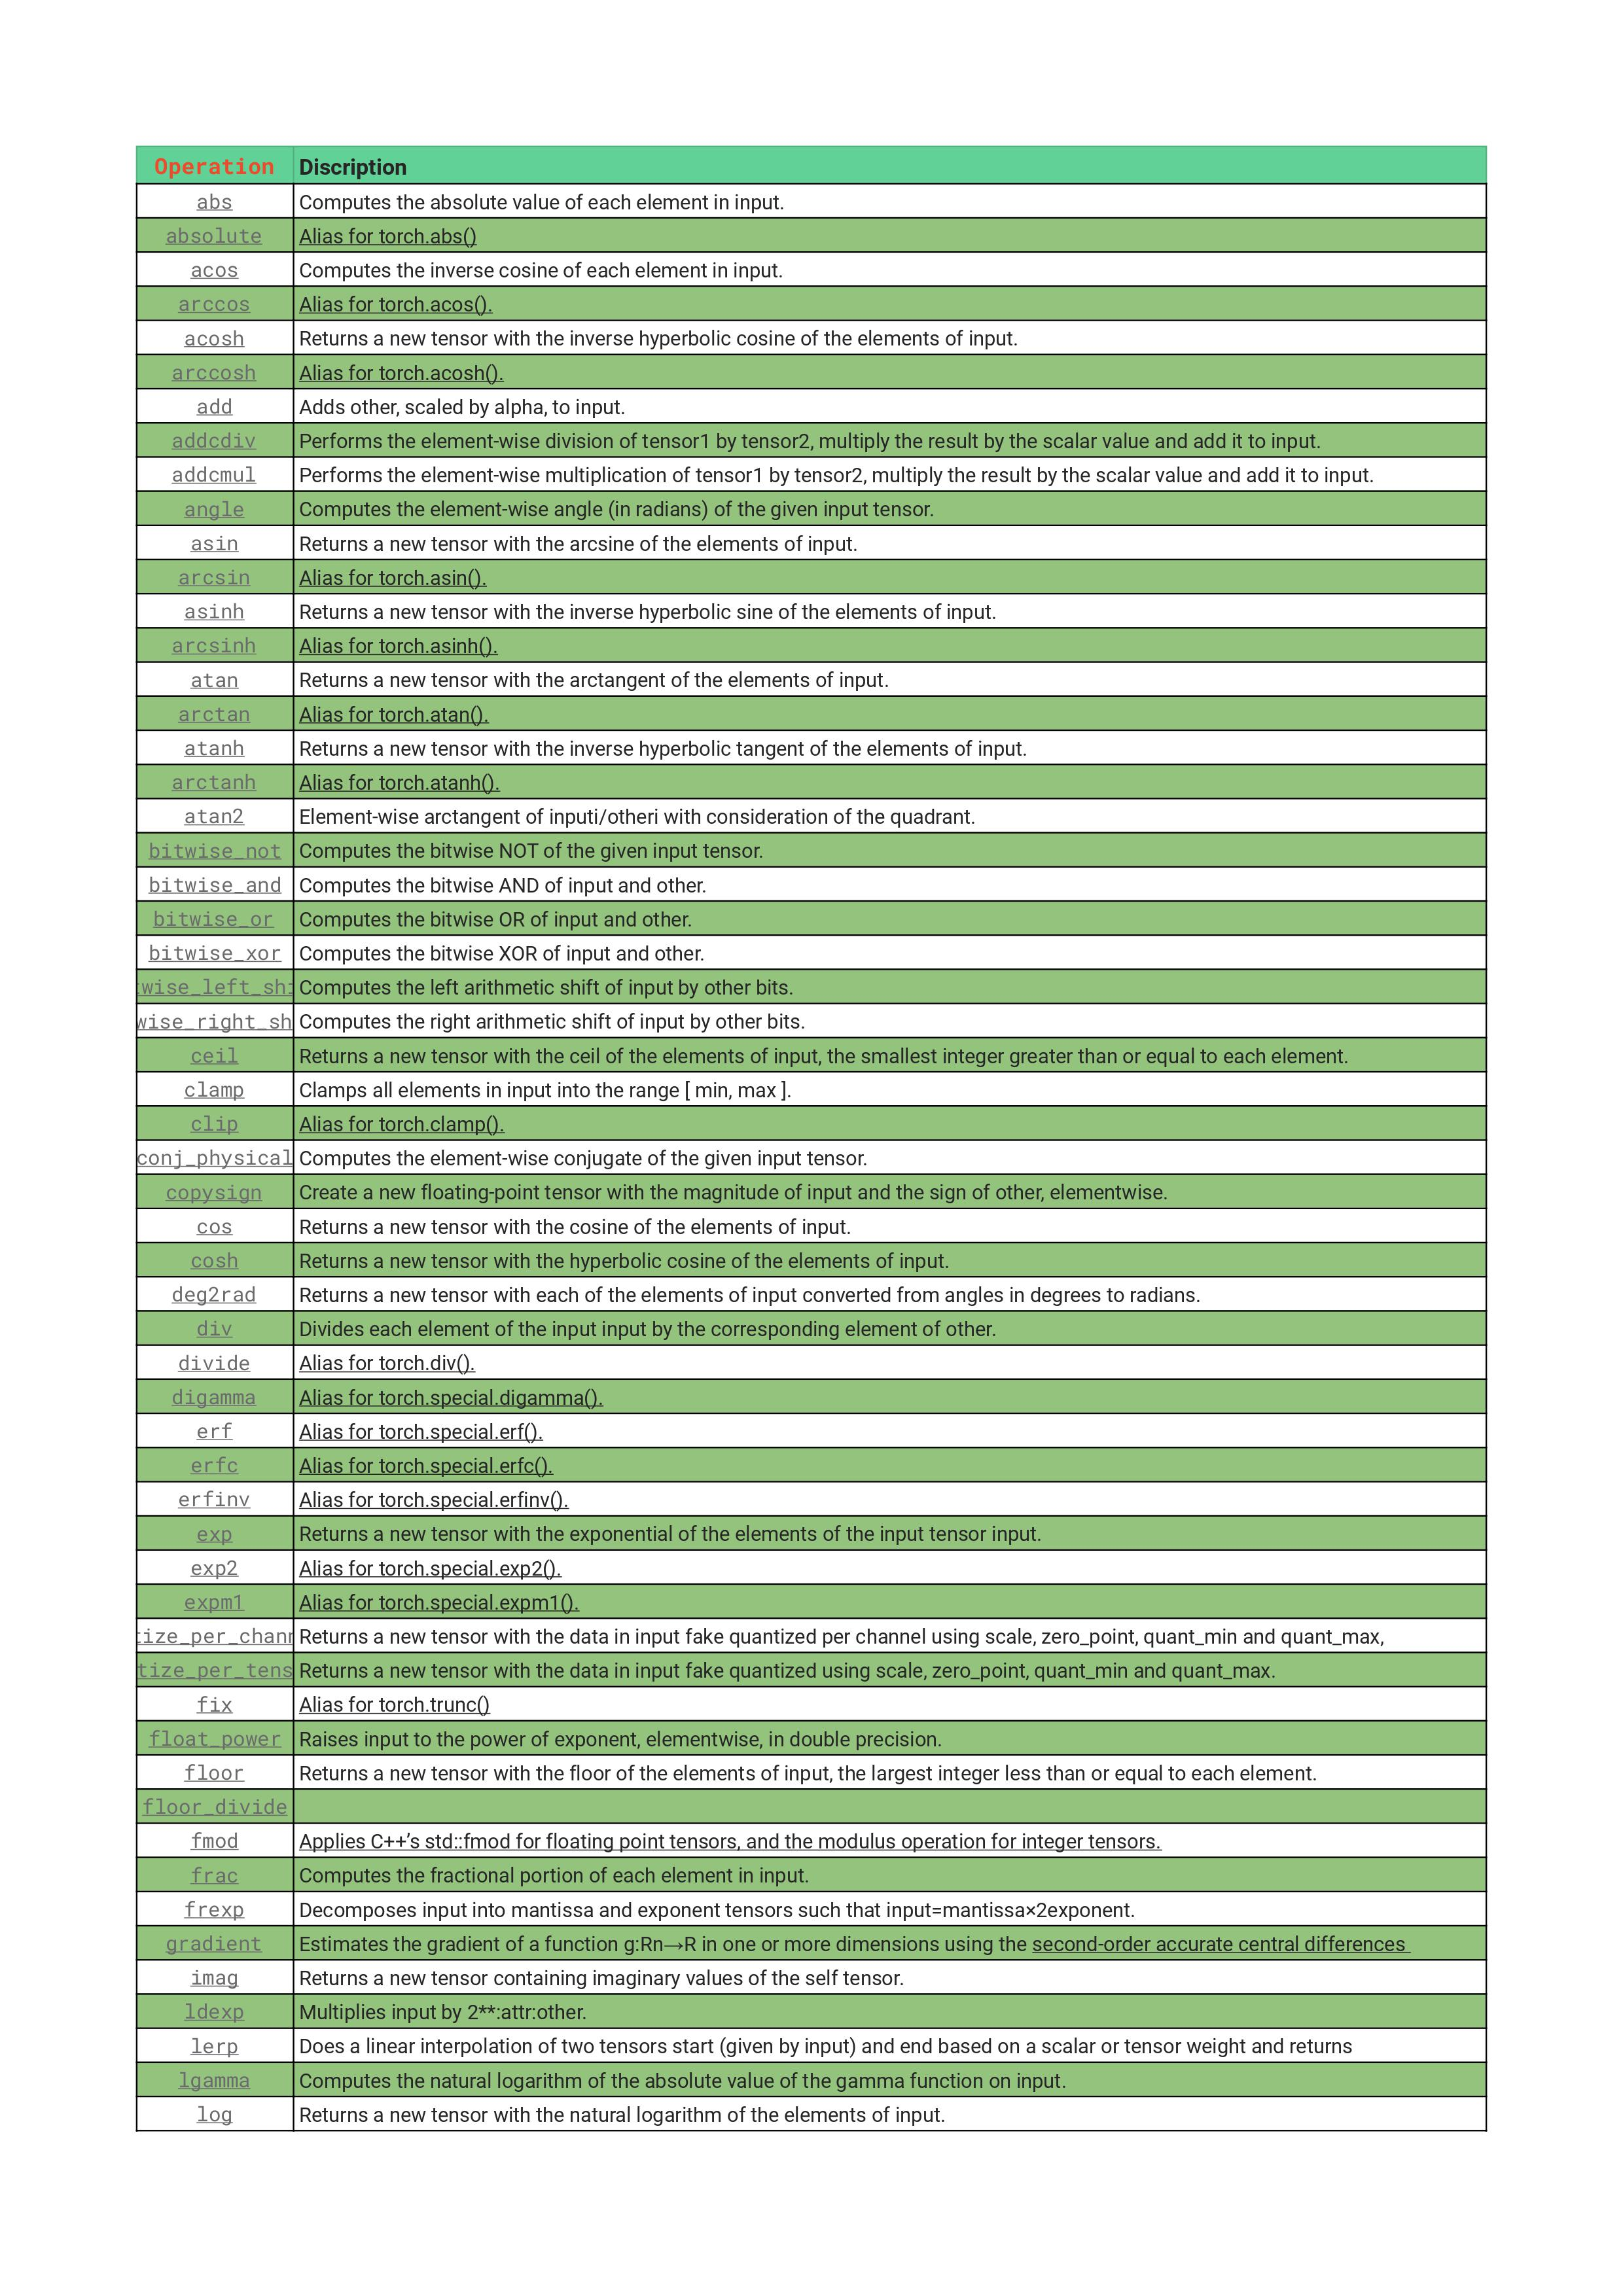

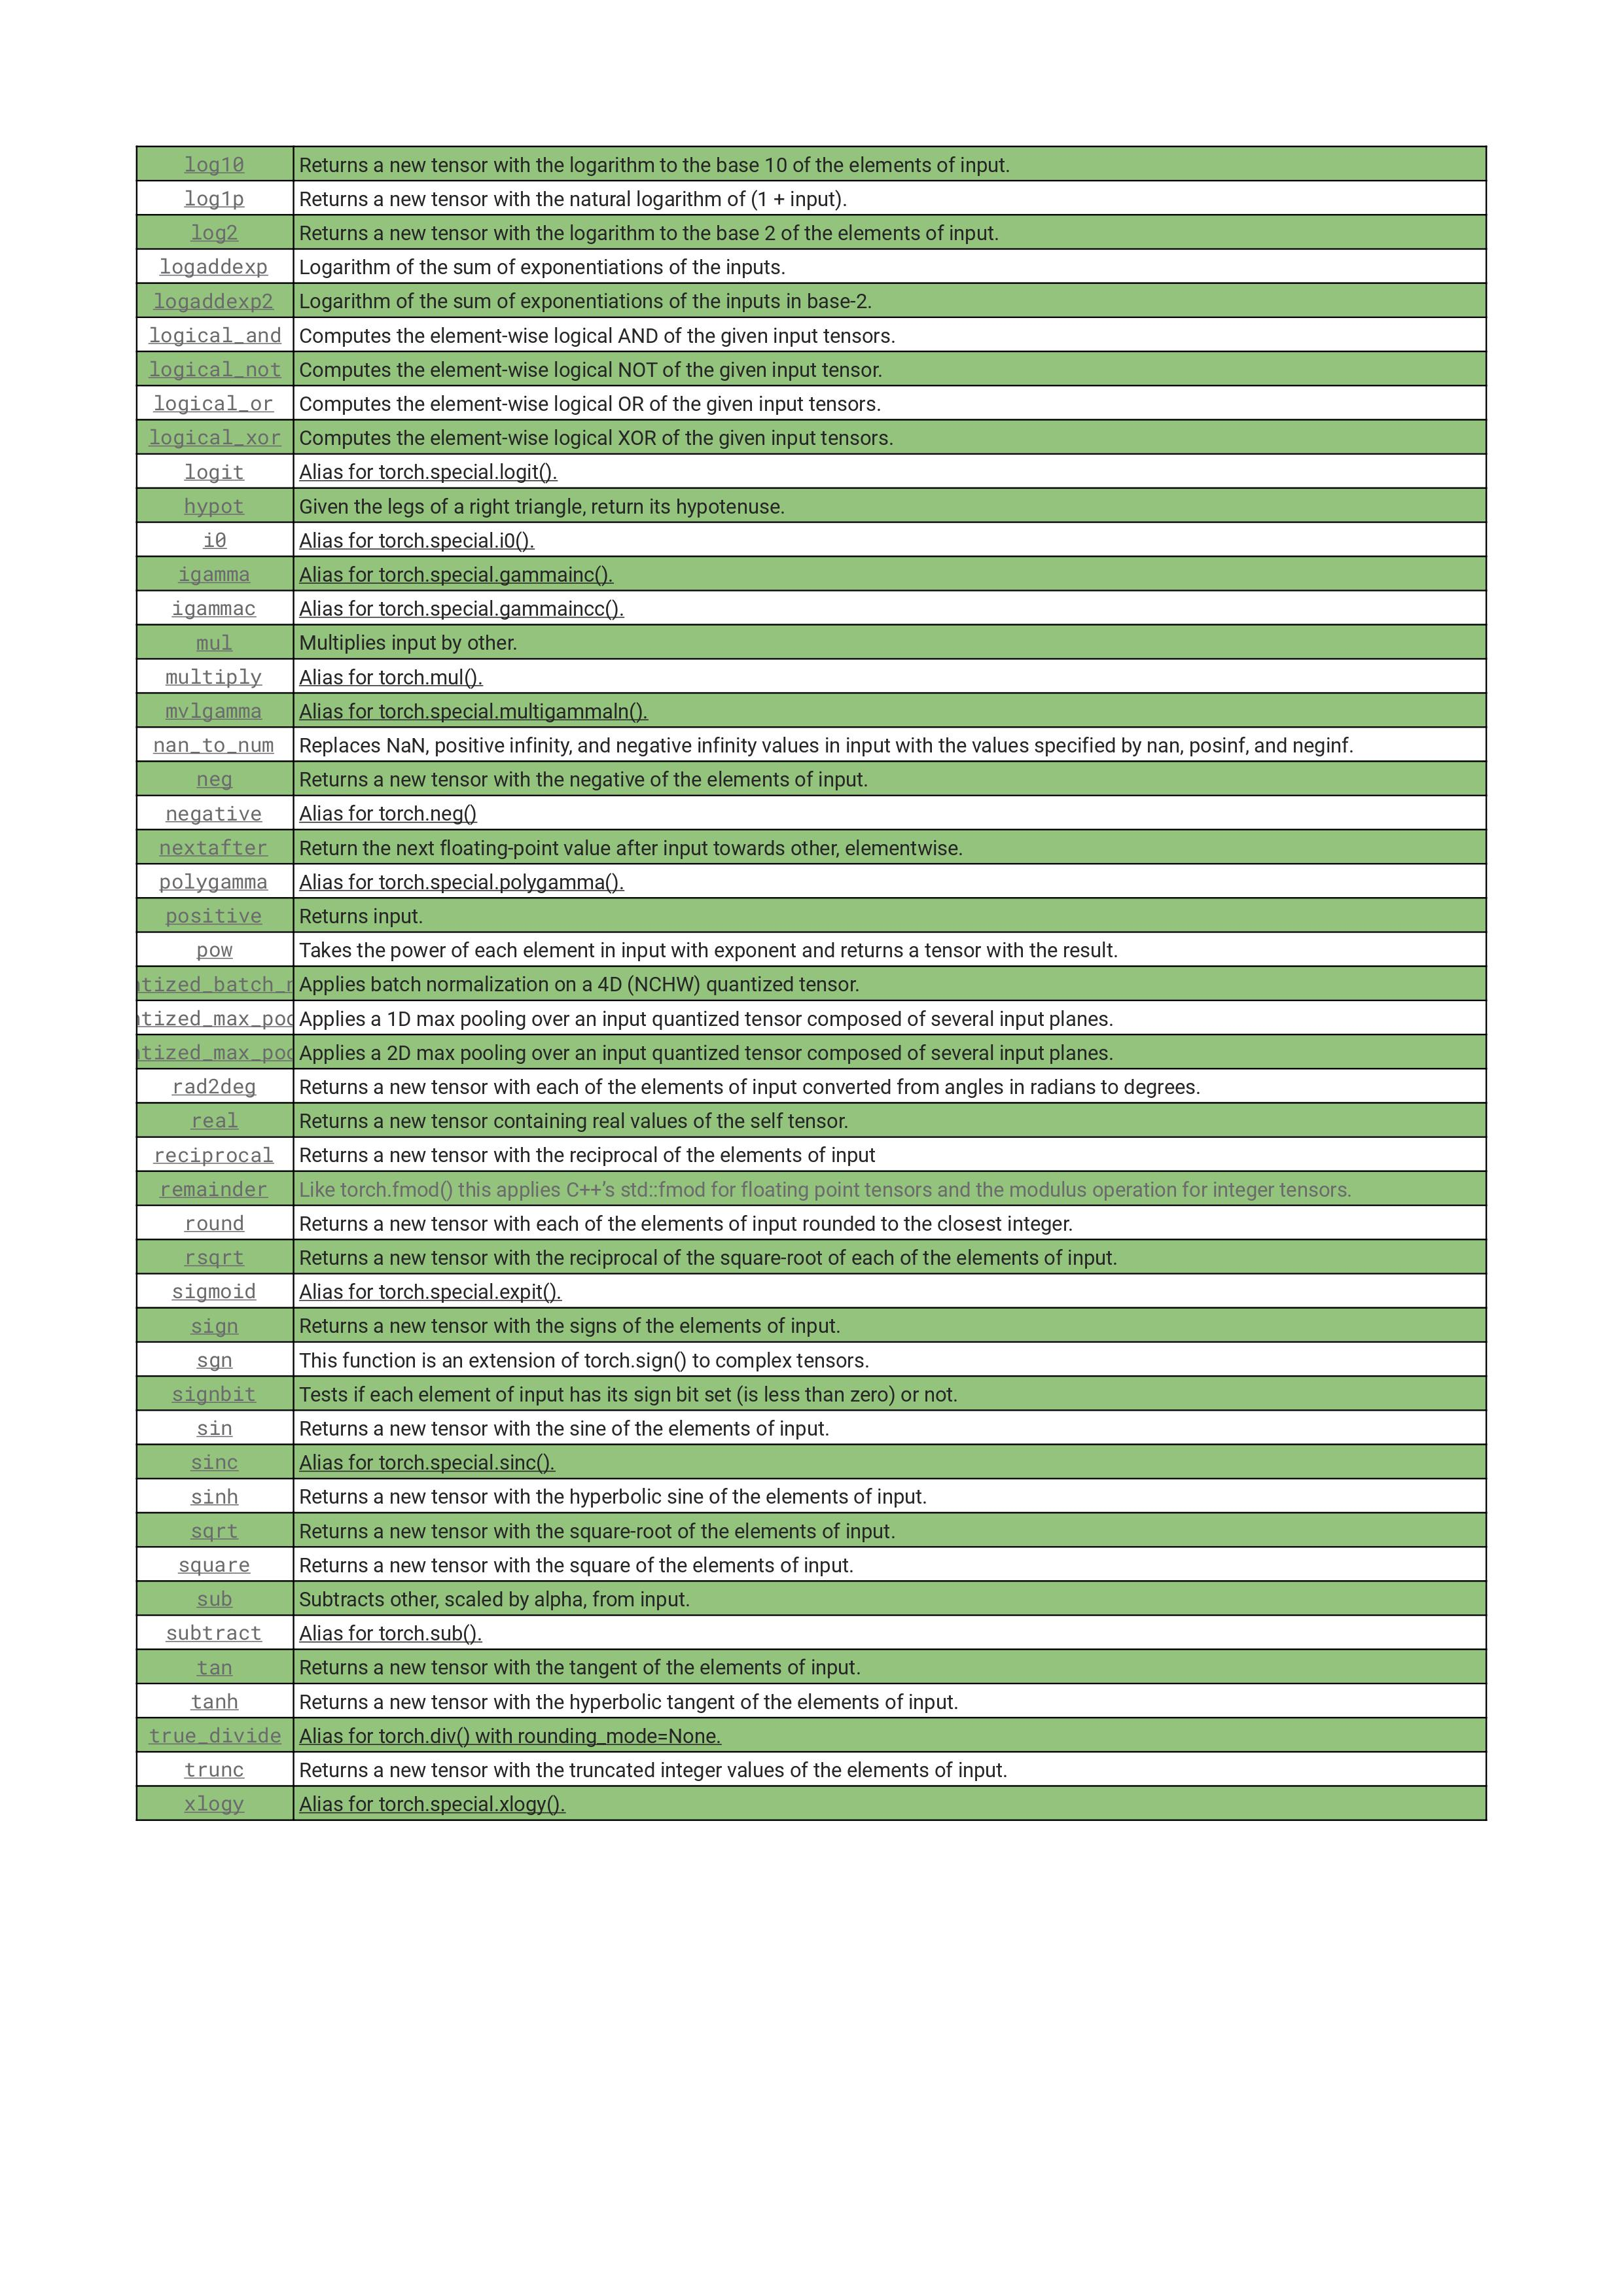

In [9]:
torch.angle(torch.tensor([-1 + 1j, -2 + 2j, 3 - 3j]))*180/3.14159

tensor([135.0001, 135.0001, -45.0000])

In [10]:
a = torch.tensor([[180.0, -180.0], [360.0, -360.0], [90.0, -90.0]])
torch.deg2rad(a)

tensor([[ 3.1416, -3.1416],
        [ 6.2832, -6.2832],
        [ 1.5708, -1.5708]])

In [11]:
a = torch.tensor([[3.142, -3.142], [6.283, -6.283], [1.570, -1.570]])
torch.rad2deg(a)

tensor([[ 180.0233, -180.0233],
        [ 359.9894, -359.9894],
        [  89.9544,  -89.9544]])

In [12]:
a = torch.randn(4)
a
torch.atan2(a, torch.randn(4))

tensor([ 2.1780,  2.3721, -2.3119, -0.3347])

In [14]:
a = torch.randn(4)
print(a)
torch.round(a)

tensor([ 1.4144, -0.6296,  1.5985,  0.7716])


tensor([ 1., -1.,  2.,  1.])

In [18]:
a = torch.tensor([2, 4, 8, 16])
print(a)
torch.sqrt(a)

tensor([ 2,  4,  8, 16])


tensor([1.4142, 2.0000, 2.8284, 4.0000])

In [21]:
a = torch.tensor([2, 4, 8, 16, -1])
print(a)
torch.rsqrt(a)  #reciprocal of the square-root of each of the elements of input.

tensor([ 2,  4,  8, 16, -1])


tensor([0.7071, 0.5000, 0.3536, 0.2500,    nan])

## Reduction Operation

```
- argmax Returns the indices of the maximum value of all elements in the input tensor.

- argmin Returns the indices of the minimum value(s) of the flattened tensor or along a dimension
```
amax

Returns the maximum value of each slice of the input tensor in the given dimension(s) dim.

amin

Returns the minimum value of each slice of the input tensor in the given dimension(s) dim.

aminmax

Computes the minimum and maximum values of the input tensor.

all

Tests if all elements in input evaluate to True.

any

param input
the input tensor.

max

Returns the maximum value of all elements in the input tensor.

min

Returns the minimum value of all elements in the input tensor.

dist

Returns the p-norm of (input - other)

logsumexp

Returns the log of summed exponentials of each row of the input tensor in the given dimension dim.

mean

Returns the mean value of all elements in the input tensor.

nanmean

Computes the mean of all non-NaN elements along the specified dimensions.

median

Returns the median of the values in input.

nanmedian

Returns the median of the values in input, ignoring NaN values.

mode

Returns a namedtuple (values, indices) where values is the mode value of each row of the input tensor in the given dimension dim, i.e. a value which appears most often in that row, and indices is the index location of each mode value found.

norm

Returns the matrix norm or vector norm of a given tensor.

nansum

Returns the sum of all elements, treating Not a Numbers (NaNs) as zero.

prod

Returns the product of all elements in the input tensor.

quantile

Computes the q-th quantiles of each row of the input tensor along the dimension dim.

nanquantile

This is a variant of torch.quantile() that “ignores” NaN values, computing the quantiles q as if NaN values in input did not exist.

std

If unbiased is True, Bessel’s correction will be used.

std_mean

If unbiased is True, Bessel’s correction will be used to calculate the standard deviation.

sum

Returns the sum of all elements in the input tensor.

unique

Returns the unique elements of the input tensor.

unique_consecutive

Eliminates all but the first element from every consecutive group of equivalent elements.

var

If unbiased is True, Bessel’s correction will be used.

var_mean

If unbiased is True, Bessel’s correction will be used to calculate the variance.

count_nonzero

Counts the number of non-zero values in the tensor input along the given dim.
```

```
argmax
argmin
amax
amin
```

In [24]:
a = torch.randn(3, 4)
print(a)
print(torch.argmax(a)) #return max element indices in given array
print(torch.argmax(a, dim=0)) #return max element indices in given array axis=0
print(torch.argmax(a, dim=1)) #return max element indices in given array axis=1

# inverse operaton for argmin

tensor([[-1.3559, -0.2559,  2.2766, -1.0530],
        [-0.0341,  0.8568,  0.3682,  0.4089],
        [-1.9640, -0.3312,  0.0726,  0.4381]])
tensor(2)
tensor([1, 1, 0, 2])
tensor([2, 1, 3])


In [27]:
a = torch.randn(3, 4)
print(a)
print(torch.amax(a)) #return max element value in given array
print(torch.amax(a, dim=0)) #return max element values in given array axis=0
print(torch.amax(a, dim=1)) #return max element values in given array axis=1

# inverse operaton for amin

tensor([[-1.6297,  0.1958,  0.4911,  1.1861],
        [-1.5570, -0.8501,  0.4086,  1.1880],
        [-1.0842,  0.9799, -0.2446,  0.0808]])
tensor(1.1880)
tensor([-1.0842,  0.9799,  0.4911,  1.1880])
tensor([1.1861, 1.1880, 0.9799])


max, min

In [32]:
a = torch.randn(2, 3)
print(a)
print(torch.max(a, 0)) #return value or indices both
print(torch.max(a, 1))

# same for minimum

tensor([[-0.0968,  2.0261,  0.5481],
        [ 0.9183,  0.4250,  0.6159]])
torch.return_types.max(
values=tensor([0.9183, 2.0261, 0.6159]),
indices=tensor([1, 0, 1]))
torch.return_types.max(
values=tensor([2.0261, 0.9183]),
indices=tensor([1, 0]))


aminmax

In [28]:
print(torch.aminmax(torch.tensor([1, -3, 5])))

# aminmax propagates NaNs
print(torch.aminmax(torch.tensor([1, -3, 5, torch.nan])))

t = torch.arange(10).view(2, 5)
print(t)
t.aminmax(dim=0, keepdim=True)

torch.return_types.aminmax(
min=tensor(-3),
max=tensor(5))
torch.return_types.aminmax(
min=tensor(nan),
max=tensor(nan))
tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


torch.return_types.aminmax(min=tensor([[0, 1, 2, 3, 4]]), max=tensor([[5, 6, 7, 8, 9]]))

```
all
Tests if all elements in input evaluate to True.

any
Tests if any element in input evaluates to True.
```

In [37]:
a = torch.rand(4, 2).bool()
print(a)
print(torch.all(a, dim=1))
print(torch.all(a, dim=0))

tensor([[True, True],
        [True, True],
        [True, True],
        [True, True]])
tensor([True, True, True, True])
tensor([True, True])


In [40]:
a = torch.tensor([False, True])
print(a)

print(torch.any(a, dim=0))

tensor([False,  True])
tensor(True)


sum, nansum

```
nansum
Returns the sum of all elements, treating Not a Numbers (NaNs) as zero.
```




In [42]:
a = torch.tensor([2, 3, 4])
print(torch.sum(a))

a = torch.randn(4, 3)
print(a)
print(torch.sum(a, 1))

b = torch.arange(4 * 5 * 6).view(4, 5, 6)
print(torch.sum(b, (2, 1)))

tensor(9)
tensor([[ 0.3080,  1.0739,  0.6921],
        [-0.0594,  0.6606,  1.2706],
        [ 0.1285,  0.3653, -0.1028],
        [-1.8583, -1.0440,  0.6380]])
tensor([ 2.0739,  1.8719,  0.3910, -2.2643])
tensor([ 435, 1335, 2235, 3135])


In [44]:
a = torch.tensor([[1, 2], [3., float("nan")]])
print(a)
print(torch.nansum(a))
print(torch.nansum(a, dim=0))
print(torch.nansum(a, dim=1))

tensor([[1., 2.],
        [3., nan]])
tensor(6.)
tensor([4., 2.])
tensor([3., 3.])


product

In [46]:
a = torch.randint(1, 5,(3, 4))
print(a)
print(torch.prod(a, 0))
print(torch.prod(a, 1))

tensor([[4, 2, 4, 2],
        [3, 3, 3, 3],
        [2, 1, 4, 4]])
tensor([24,  6, 48, 24])
tensor([64, 81, 32])


count_nonzero

In [49]:
x = torch.zeros(3,3)
x[torch.randn(3,3) > 0.5] = 1
print(x)
print(torch.count_nonzero(x))
print(torch.count_nonzero(x, dim=0))

tensor([[0., 0., 0.],
        [1., 0., 1.],
        [1., 0., 1.]])
tensor(4)
tensor([2, 0, 2])


unique

In [50]:
output = torch.unique(torch.tensor([1, 3, 2, 3], dtype=torch.long))
print(output)

output, inverse_indices = torch.unique(torch.tensor([1, 3, 2, 3], dtype=torch.long), sorted=True, return_inverse=True)
print(output)
print(inverse_indices)

output, inverse_indices = torch.unique(torch.tensor([[1, 3], [2, 3]], dtype=torch.long), sorted=True, return_inverse=True)
print(output)
print(inverse_indices)

tensor([1, 2, 3])
tensor([1, 2, 3])
tensor([0, 2, 1, 2])
tensor([1, 2, 3])
tensor([[0, 2],
        [1, 2]])


dist, norm

```
dist
torch.dist(input, other, p=2) → Tensor

norm
Returns the matrix norm or vector norm of a given tensor.
```

In [51]:
x = torch.randn(4)
print(x)
y = torch.randn(4)
print(y)

print(torch.dist(x, y, 3.5))
print(torch.dist(x, y, 3))
print(torch.dist(x, y, 0))
print(torch.dist(x, y, 1))

tensor([ 1.0327,  0.7729,  1.0621, -0.9294])
tensor([ 1.7166, -1.1877,  0.7488,  1.1684])
tensor(2.4855)
tensor(2.5773)
tensor(4.)
tensor(5.0556)


In [52]:
import torch
a = torch.arange(9, dtype= torch.float) - 4
b = a.reshape((3, 3))
print(torch.norm(a))
print(torch.norm(b))
# torch.norm(a, float('inf'))
# torch.norm(b, float('inf'))
# c = torch.tensor([[ 1, 2, 3],[-1, 1, 4]] , dtype= torch.float)
# torch.norm(c, dim=0)
# torch.norm(c, dim=1)
# torch.norm(c, p=1, dim=1)
# d = torch.arange(8, dtype= torch.float).reshape(2,2,2)
# torch.norm(d, dim=(1,2))
# torch.norm(d[0, :, :]), torch.norm(d[1, :, :])

tensor(7.7460)
tensor(7.7460)


```
mean
median
mode

nanmean
nanmedian
```
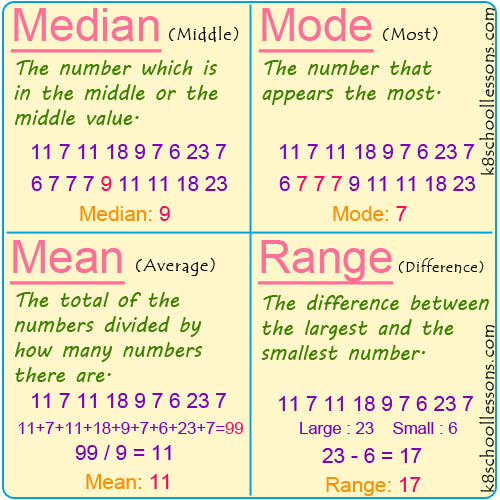

In [56]:
a = torch.randint(1, 5, (2, 3), dtype=float)
print(a)
print(torch.mean(a, 0))
print(torch.mean(a, 1))
print(torch.mean(a, 1, True))

tensor([[4., 3., 1.],
        [2., 2., 2.]], dtype=torch.float64)
tensor([3.0000, 2.5000, 1.5000], dtype=torch.float64)
tensor([2.6667, 2.0000], dtype=torch.float64)
tensor([[2.6667],
        [2.0000]], dtype=torch.float64)


In [59]:
a = torch.randint(1, 5, (4, 3), dtype=float)
print(a)
print(torch.median(a, 0))
print(torch.median(a, 1))

tensor([[3., 1., 4.],
        [4., 1., 4.],
        [4., 1., 2.],
        [1., 4., 3.]], dtype=torch.float64)
torch.return_types.median(
values=tensor([3., 1., 3.], dtype=torch.float64),
indices=tensor([0, 1, 3]))
torch.return_types.median(
values=tensor([3., 4., 2., 3.], dtype=torch.float64),
indices=tensor([0, 0, 2, 2]))


std, std_mean, div
```
f unbiased is True, Bessel’s correction will be used to calculate the standard deviation. Otherwise, the sample deviation is calculated, without any correction.

```

In [60]:
a = torch.tensor([[-0.8166, -1.3802, -0.3560]])
torch.std(a, unbiased=False)

tensor(0.4188)

In [61]:
a = torch.tensor([[-0.8166, -1.3802, -0.3560]])
torch.std_mean(a, unbiased=False) # return standard devatation and mean

(tensor(0.4188), tensor(-0.8509))

In [62]:
a = torch.tensor([[-0.8166, -1.3802, -0.3560]])
torch.var(a, unbiased=False)

tensor(0.1754)

In [63]:
a = torch.tensor([[-0.8166, -1.3802, -0.3560]])
torch.var_mean(a, unbiased=False)

(tensor(0.1754), tensor(-0.8509))

## Comaprison ops

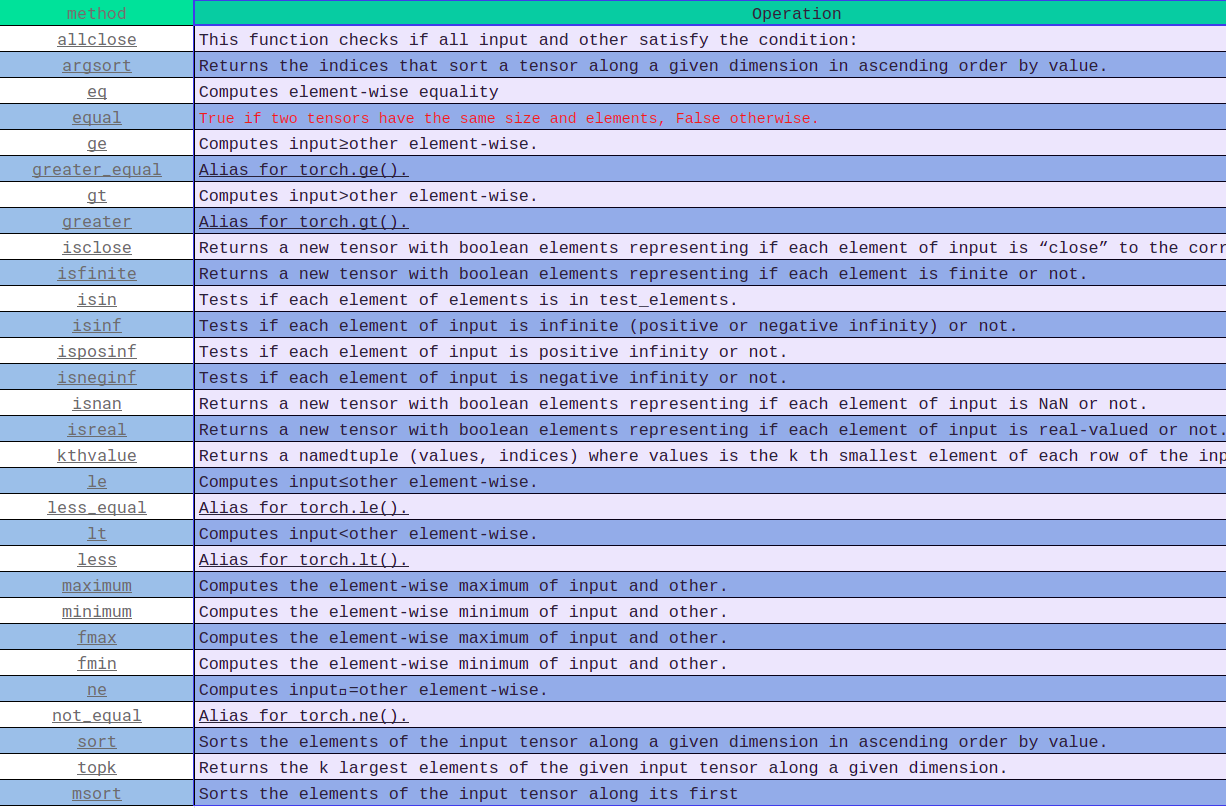